for polyjuice similarities are computed. You can only start from  loading the .npy arrays


In [4]:
import pandas as pd
path = ''

In [5]:
df_path = path + 'results/polyjuice_exp_diverse.xlsx' 
groundtruth_col = 'Text'
exp_col = 'Counterfactual'


In [8]:
df = pd.read_excel(df_path)

# Stability

In [9]:
import numpy as np
sim_x_poly = np.load(path + 'explanations/sentence_sim_polyjuice_x.npy') 
sim_y_poly = np.load(path + 'explanations/sentence_sim_polyjuice_y.npy') 

sim_x_mice = np.load(path + 'explanations/sentence_sim_mice_x_diverse.npy') 
sim_y_mice = np.load(path + 'explanations/sentence_sim_mice_y_diverse.npy') 

In [10]:
df_ori = pd.read_csv(path + 'data/Restaurant_Reviews.tsv', delimiter ='\t') 
liked = df_ori['Liked'].values

In [17]:
df_stab = pd.read_excel(path + 'results/stab_results.xlsx')

In [30]:
df_stab[r"$d(x'_{cf}, x_{cf})$"] = 1 - df_stab['sim_y']
df_stab[r"$d(x', x)$"] = 1 - df_stab['sim_x']

In [35]:
df_stab[r"$d(x', x)$"].min()

-1.1920928959519017e-06

In [44]:
df_stab['label'] = df_stab['label'].replace(0, '-')
df_stab['label'] = df_stab['label'].replace(1, '+')

In [48]:
df_stab.rename(columns = {'label':'Foil'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
The PostScript backend does not suppo

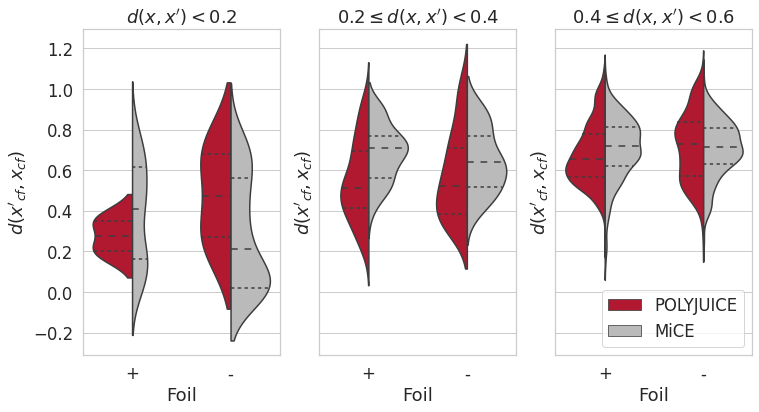

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns 


palette = ["#ca0020", "#bababa" ]
sns.set(font_scale = 1.5)

sns.set_style("whitegrid")
sns.set_palette(palette)

fig, axes = plt.subplots(1,3,sharex=True,sharey=True, figsize=(12,6))
# plot violin. 'Scenario' is according to x axis, 
p1 = sns.violinplot('Foil', r"$d(x'_{cf}, x_{cf})$", data=df_stab[df_stab[r"$d(x', x)$"] <0.2], ax = axes[0], inner="quartile", hue='method', split=True, label=False)
p2 = sns.violinplot('Foil', r"$d(x'_{cf}, x_{cf})$", data=df_stab[(df_stab[r"$d(x', x)$"] < 0.4 ) & (df_stab[r"$d(x', x)$"] >=0.2)], ax = axes[1], inner="quartile",  hue='method', split=True, legend=0)
p3 = sns.violinplot('Foil', r"$d(x'_{cf}, x_{cf})$", data=df_stab[(df_stab[r"$d(x', x)$"] < 0.6 ) & (df_stab[r"$d(x', x)$"] >=0.4)], ax = axes[2], inner="quartile",  hue='method', split=True, legend=False)

p1.legend_.remove()
p2.legend_.remove()
p3.legend_.remove()

axes[0].title.set_text(r"$d(x, x') < 0.2$")
axes[1].title.set_text(r"$0.2 \leq d(x, x') < 0.4$")
axes[2].title.set_text(r"$0.4 \leq d(x, x') < 0.6$")


plt.legend(loc='lower right')
plt.savefig(path +'vis_res/stability_violin.eps', format='eps', dpi=1200,bbox_inches='tight')



In [62]:
sim_x_0 = []
sim_x_1 = []

sim_y_0 = []
sim_y_1 = []

In [63]:
sim_x = sim_x_mice
sim_y = sim_y_mice

for i in range(sim_x.shape[0]):
  for j in range(sim_x.shape[1]):
    if sim_x[i][j] < 0 or sim_y[i][j] < 0:
      continue
    if liked[i] == liked[j]:
      if liked[i] == 1:
        sim_x_1.append(sim_x[i][j])        
        sim_y_1.append(sim_y[i][j])
      else:
        sim_x_0.append(sim_x[i][j])        
        sim_y_0.append(sim_y[i][j])


In [64]:
ind = np.random.choice(len(sim_x_0), 500)
sim_x_0_mini = [sim_x_0[i] for i in ind]
sim_y_0_mini = [sim_y_0[i] for i in ind]

ind = np.random.choice(len(sim_x_0), 500)
sim_x_1_mini = [sim_x_1[i] for i in ind]
sim_y_1_mini = [sim_y_1[i] for i in ind]


In [65]:
palette = ['#ca0020', '#bababa', '#7484AD', '#EDDEA4', '#F7A072', '#314570']
c_label0 = palette[0]
c_label1 = palette[1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


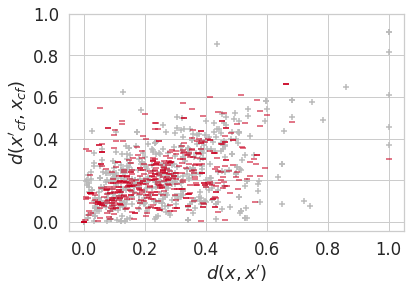

In [75]:
import matplotlib.pyplot as plt


plt.scatter(sim_x_1_mini, sim_y_1_mini, color=c_label1, marker='+',  label='Positive Sentiment') #, alpha=0.7)
plt.scatter(sim_x_0_mini, sim_y_0_mini, color=c_label0, marker='_',  label='Negative Sentiment', alpha=0.7)
# plt.legend()
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])

plt.xlabel(r"$d(x, x')$",fontsize=18)
plt.ylabel(r"$d(x'_{cf}, x_{cf})$",fontsize=18)
plt.savefig(path + 'vis_res/stability_mice.eps', format='eps', dpi=1200,bbox_inches='tight')


In [68]:
sim_x = sim_x_poly
sim_y = sim_y_poly

for i in range(sim_x.shape[0]):
  for j in range(sim_x.shape[1]):
    if sim_x[i][j] < 0 or sim_y[i][j] < 0:
      continue
    if liked[i] == liked[j]:
      if liked[i] == 1:
        sim_x_1.append(sim_x[i][j])        
        sim_y_1.append(sim_y[i][j])
      else:
        sim_x_0.append(sim_x[i][j])        
        sim_y_0.append(sim_y[i][j])

ind = np.random.choice(len(sim_x_0), 500)
sim_x_0_mini = [sim_x_0[i] for i in ind]
sim_y_0_mini = [sim_y_0[i] for i in ind]

ind = np.random.choice(len(sim_x_0), 500)
sim_x_1_mini = [sim_x_1[i] for i in ind]
sim_y_1_mini = [sim_y_1[i] for i in ind]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


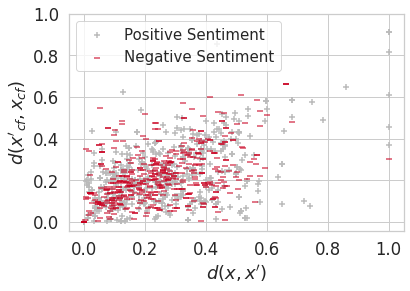

In [74]:
import matplotlib.pyplot as plt
plt.scatter(sim_x_1_mini, sim_y_1_mini, color=c_label1, marker='+',  label='Positive Sentiment')
plt.scatter(sim_x_0_mini, sim_y_0_mini, color=c_label0, marker='_',  label='Negative Sentiment', alpha=0.7)
plt.legend(fontsize=15)
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])

plt.xlabel(r"$d(x, x')$",fontsize=18)
plt.ylabel(r"$d(x'_{cf}, x_{cf})$",fontsize=18)
plt.savefig(path + 'vis_res/stability_polyjuice.eps', format='eps', dpi=1200,bbox_inches='tight')